# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [171]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [289]:
# Importando a base de dados

caminho = r'/content/previsao_de_renda.csv'

df = pd.read_csv(caminho)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [291]:
# Antes de iniciar as atividades irei realizar a limpeza da base de dados.

# Como a base de dados é grande irei realizar a exclusão das linhas que possuem dados faltantes.

df = df.dropna()

# Depois vou eliminar as linhas com dados duplicados.

df = df.drop_duplicates()

# Agora realizo o reset do index

df = df.reset_index()

In [292]:
# Tranformando as colunas posse_de_veiculo e posse_de_imovel em int

df.posse_de_veiculo = [int(x) for x in df.posse_de_veiculo]
df.posse_de_imovel = [int(x) for x in df.posse_de_imovel]

# Removendo as colunas que não serão utilizadas no modelo

df = df.drop(columns=['index', 'Unnamed: 0', 'data_ref', 'id_cliente'])

# Com a base de dados tratada, pode-se iniciar a modelagem.

---
---
1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

---
---
### 1. Separando a base de dados

In [294]:
# Variáveis explicativas

X = df.drop(columns=['renda']).copy()

# Variável respostas

y = df[['renda']]

In [295]:
# Usando o skitlearn para realizar a separação da base de dados

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873, train_size=0.75)

In [296]:
df_treinamento = pd.concat([X_train, y_train], axis=1)
df_teste = pd.concat([X_test, y_test], axis=1)

---
---
### 2. Regularização Ridge

In [297]:
modelo = 'renda ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia + 0'

md = smf.ols(modelo, data=df_teste)

In [298]:
# Lista com os alphas que serão testados

alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

# Laço de repetição iterando sobre a lista de alphas

for i in alpha:
    reg = md.fit_regularized(method='elastic_net',
                         refit=True,
                         L1_wt=0.001, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
                         alpha=i)
    # print(reg.summary())
    print(f'Alpha: {i}')
    print(f'R²: {round(reg.rsquared, 4)}')
    print(f'R² Ajustado: {round(reg.rsquared_adj, 4)}')
    print(f'AIC: {round(reg.aic, 4)}\n')

Alpha: 0
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.001
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.005
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.01
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.05
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.1
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308



Observando os valores de R² obtidos, todas modelagens obtidas tiveram R² igual a 0.2791. Ou seja, não há um modelo melhor que o outro.

Vale dizer que nenhum dos parâmetros analisado apresentaram mudança de valor.

---
---
### 3. Regularização Lasso

In [299]:
# Laço de repetição iterando sobre a lista de alphas

for i in alpha:
    reg = md.fit_regularized(method='elastic_net',
                         refit=True,
                         L1_wt=1, # Na regularização Lasso, o valor de L1_wt deve ser igual a 1
                         alpha=i)
    print(f'Alpha: {i}')
    print(f'R²: {round(reg.rsquared, 4)}')
    print(f'R² Ajustado: {round(reg.rsquared_adj, 4)}')
    print(f'AIC: {round(reg.aic, 4)}\n')

Alpha: 0
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.001
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.005
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.01
R²: 0.2791
R² Ajustado: 0.2735
AIC: 63625.308

Alpha: 0.05
R²: 0.279
R² Ajustado: 0.2739
AIC: 63621.6531

Alpha: 0.1
R²: 0.279
R² Ajustado: 0.2739
AIC: 63621.6531



Assim como foi observado para a regularização Ridge, não houve mudança nos valores de R², em relação à alpha. Os demais parâmetros também não apresentaram mudança significativa.

---
---
### 4. Modelo stepwise

In [300]:
# A modelagem stepwise não aceita variáveis categóricas, dessa forma utiliza-se o getdummies para transforma-las.

X_test_1 = pd.get_dummies(X_test)
X_train_1 = pd.get_dummies(X_train)

# Novo dataframe com as dummies

df_teste_1 = pd.concat([X_test_1, y_test], axis=1)
df_treinamento_1 = pd.concat([X_train_1, y_train], axis=1)

In [301]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [302]:
variaveis = stepwise_selection(X_test_1, y_test)

print('resulting features:')
print(variaveis)

Add  tempo_emprego                  with p-value 4.40265e-120
#############
['tempo_emprego']
Add  sexo_M                         with p-value 1.62931e-94
#############
['tempo_emprego', 'sexo_M']
Add  sexo_F                         with p-value 2.99973e-39
#############
['tempo_emprego', 'sexo_M', 'sexo_F']
Add  educacao_Superior completo     with p-value 3.54514e-05
#############
['tempo_emprego', 'sexo_M', 'sexo_F', 'educacao_Superior completo']
Add  tipo_renda_Empresário          with p-value 0.00262125
#############
['tempo_emprego', 'sexo_M', 'sexo_F', 'educacao_Superior completo', 'tipo_renda_Empresário']
Add  idade                          with p-value 0.0134873
#############
['tempo_emprego', 'sexo_M', 'sexo_F', 'educacao_Superior completo', 'tipo_renda_Empresário', 'idade']
Add  qtd_filhos                     with p-value 0.0315821
#############
['tempo_emprego', 'sexo_M', 'sexo_F', 'educacao_Superior completo', 'tipo_renda_Empresário', 'idade', 'qtd_filhos']
#############
['

Segundo o stepwise, o melhor modelo é o que apresenta as seguintes variáveis:

['tempo_emprego', 'sexo_M', 'sexo_F', 'educacao_Superior completo', 'tipo_renda_Empresário', 'idade', 'qtd_filhos']

Com R² igual à 0.0316, que é um valor baixo, menor do que os valores obtidos pela modelagem Ridge e Lasso.

---
---
### 5. Comparação dos modelos


Comparando os modelos, os modelos Ridge e Lasso apresentaram o melhor R², 0.2791. Este valor é superior ao obtido pelo modelo de stepwise.

---
---
### 6. Melhorando R²

In [347]:
# Para tentar melhorar o valor de R² irei colocar variável resposta em log e remover as variáveis que não estão ajudando o modelo

# Vou modelar usando Lasso e alpha igual a 0.1. Depois que eu obter um valor razoável de R² irei variar o alpha

modelo = 'np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia + 0'

md = smf.ols(modelo, data=df_teste)

reg = md.fit_regularized(method='elastic_net',
                        refit=True,
                        L1_wt=1, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
                        alpha=0.1)
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     265.8
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          5.62e-275
Time:                        19:28:32   Log-Likelihood:                -3386.3
No. Observations:                3107   AIC:                             6787.
Df Residuals:                    3101   BIC:                             6829.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(

Só de colocar o ln na variável resposta o valor de R² passou para 0.340

In [348]:
# Como o valor de C(tipo_residencia)[T.Casa] continua fazendo parte do modelo, mas seu valor de p-value está acima de 5% irei remove-lo do modelo.

modelo = 'np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + idade + tempo_emprego + qt_pessoas_residencia + 0'

md = smf.ols(modelo, data=df_teste)

reg = md.fit_regularized(method='elastic_net',
                        refit=True,
                        L1_wt=1, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
                        alpha=0.1)
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     232.2
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.18e-278
Time:                        19:30:21   Log-Likelihood:                -3375.9
No. Observations:                3107   AIC:                             6768.
Df Residuals:                    3100   BIC:                             6816.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
C(se

A remoção da variável aumentou o valor de R², R² ajustado e AIC.

In [349]:
# Como qtd_filhos também apresenta p-value acima de 5%, ela também será removido da modelagem.

modelo = 'np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + C(tipo_renda) + C(educacao) + C(estado_civil) + idade + tempo_emprego + qt_pessoas_residencia + 0'

md = smf.ols(modelo, data=df_teste)

reg = md.fit_regularized(method='elastic_net',
                        refit=True,
                        L1_wt=1, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
                        alpha=0.1)
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     231.9
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          7.22e-278
Time:                        19:35:21   Log-Likelihood:                -3376.7
No. Observations:                3107   AIC:                             6769.
Df Residuals:                    3100   BIC:                             6818.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
C(se

Sua remoção não alterou muito o valor de R², R² ajustado e AIC. Contudo, fez com que qt_pessoas_residencia apresentasse p-value acima de 5%.

In [350]:
# Removendo qt_pessoas_residencia

modelo = 'np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + C(tipo_renda) + C(educacao) + C(estado_civil) + idade + tempo_emprego + 0'

md = smf.ols(modelo, data=df_teste)

reg = md.fit_regularized(method='elastic_net',
                        refit=True,
                        L1_wt=1, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
                        alpha=0.1)
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     270.3
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          7.47e-279
Time:                        19:37:17   Log-Likelihood:                -3377.3
No. Observations:                3107   AIC:                             6769.
Df Residuals:                    3101   BIC:                             6811.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
C(se

A remoção das últimas duas variáveis não tiveram efeito significativo sobre o valor de R², R² ajustado e AIC. Entretanto, não temos mais variáveis com p-value acima de 5%. Além disso, a remoção dessas variáveis torna o modelo mais simples, o que é muito bom. Simplificar o modelo sempre é interessante para modelagem.

Agora para tentar melhorar o valor de R² posso modificar o valor de alpha.

In [351]:
modelo = 'np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + C(tipo_renda) + C(educacao) + C(estado_civil) + idade + tempo_emprego + 0'

md = smf.ols(modelo, data=df_teste)

for i in alpha:
    reg = md.fit_regularized(method='elastic_net',
                            refit=True,
                            L1_wt=1, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
                            alpha=i)

    print(f'Alpha: {i}')
    print(f'R²: {round(reg.rsquared, 4)}')
    print(f'R² Ajustado: {round(reg.rsquared_adj, 4)}')
    print(f'AIC: {round(reg.aic, 4)}\n')

Alpha: 0
R²: 0.3541
R² Ajustado: 0.3506
AIC: 6741.5278

Alpha: 0.001
R²: 0.3536
R² Ajustado: 0.3511
AIC: 6733.7951

Alpha: 0.005
R²: 0.3528
R² Ajustado: 0.3509
AIC: 6731.7368

Alpha: 0.01
R²: 0.3513
R² Ajustado: 0.3498
AIC: 6735.2707

Alpha: 0.05
R²: 0.3464
R² Ajustado: 0.3452
AIC: 6756.3545

Alpha: 0.1
R²: 0.3434
R² Ajustado: 0.3423
AIC: 6768.6385



Utilizando alpha igual a zero obteve-se o maior valor de R², 0.3541.

In [352]:
for i in alpha:
    reg = md.fit_regularized(method='elastic_net',
                            refit=True,
                            L1_wt=0.001, # Para realizar uma regularização Ridge o valor de L1_wt precisa ser próximo de zero
                            alpha=i)

    print(f'Alpha: {i}')
    print(f'R²: {round(reg.rsquared, 4)}')
    print(f'R² Ajustado: {round(reg.rsquared_adj, 4)}')
    print(f'AIC: {round(reg.aic, 4)}\n')

Alpha: 0
R²: 0.3541
R² Ajustado: 0.3506
AIC: 6741.5278

Alpha: 0.001
R²: 0.3541
R² Ajustado: 0.3506
AIC: 6741.5278

Alpha: 0.005
R²: 0.3531
R² Ajustado: 0.35
AIC: 6742.4148

Alpha: 0.01
R²: 0.3541
R² Ajustado: 0.3506
AIC: 6741.5278

Alpha: 0.05
R²: 0.3534
R² Ajustado: 0.3503
AIC: 6740.7516

Alpha: 0.1
R²: 0.3539
R² Ajustado: 0.3506
AIC: 6740.4468



Utilizando a modelagem com Ridge o valor de R² obtido foi menor que de Lasso.

---
### 7. Árvore de regressão

Para obter o valor de R² decidi utilizar um método de pós-poda.

In [330]:
# Modelo de regressão

regr_1 = DecisionTreeRegressor(max_depth=20) # É a profundidade que apresenta o maior valor de R²

regr_1.fit(X_train_1, y_train) # Aqui eu preciso usar a base de dados com o get_dummies

# Obtenção do R²

mse1 = regr_1.score(X_train_1, y_train)

template = "O R² da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))


O R² da árvore com profundidade=20 é: 0,82


In [331]:
# Usando o ccp que pondera a complexidade da árvore, que ajuda a fazer a poda da árvore

path = regr_1.cost_complexity_pruning_path(X_train_1, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0, 0.5, 'Impureza total das folhas')

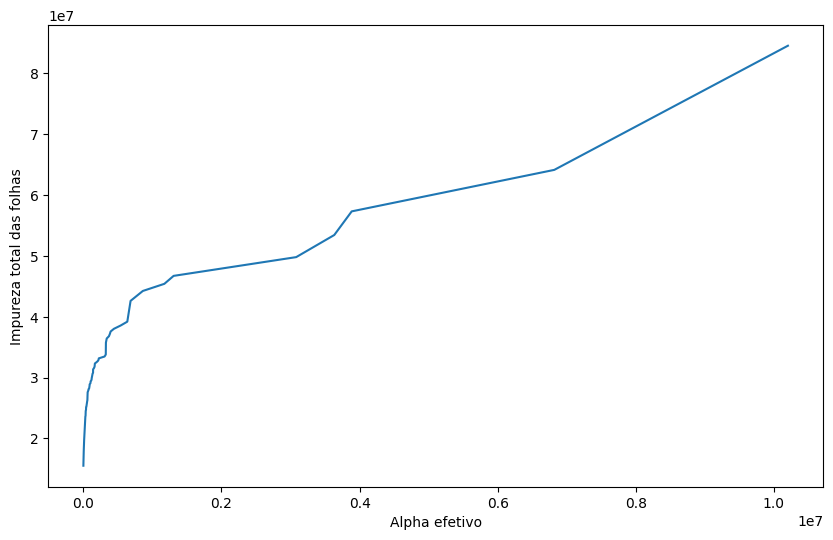

In [332]:
# Plot entre os resultados obtidos acima

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [333]:
clfs = []

# Looping para construir uma nova árvore para cada ccp

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_1, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

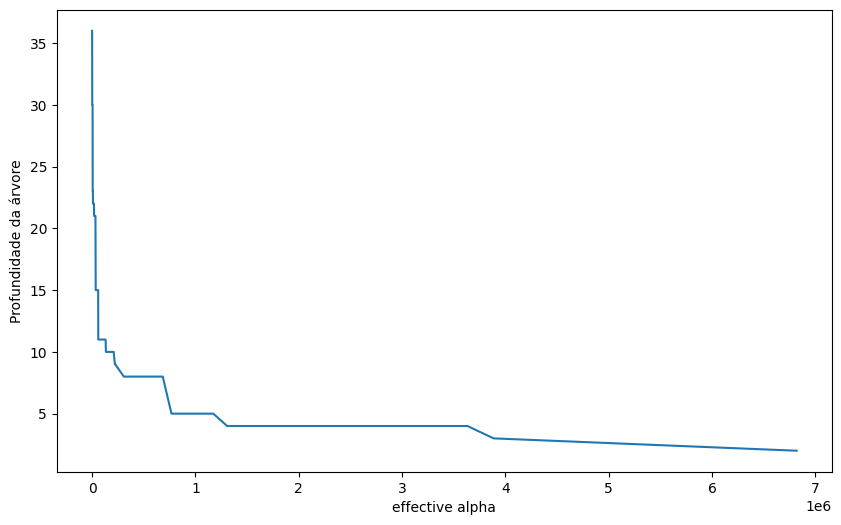

In [334]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

In [335]:
# MSE para cada alpha (List compreension)

train_scores = [mean_squared_error(y_train , clf.predict(X_train_1)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test_1)) for clf in clfs]

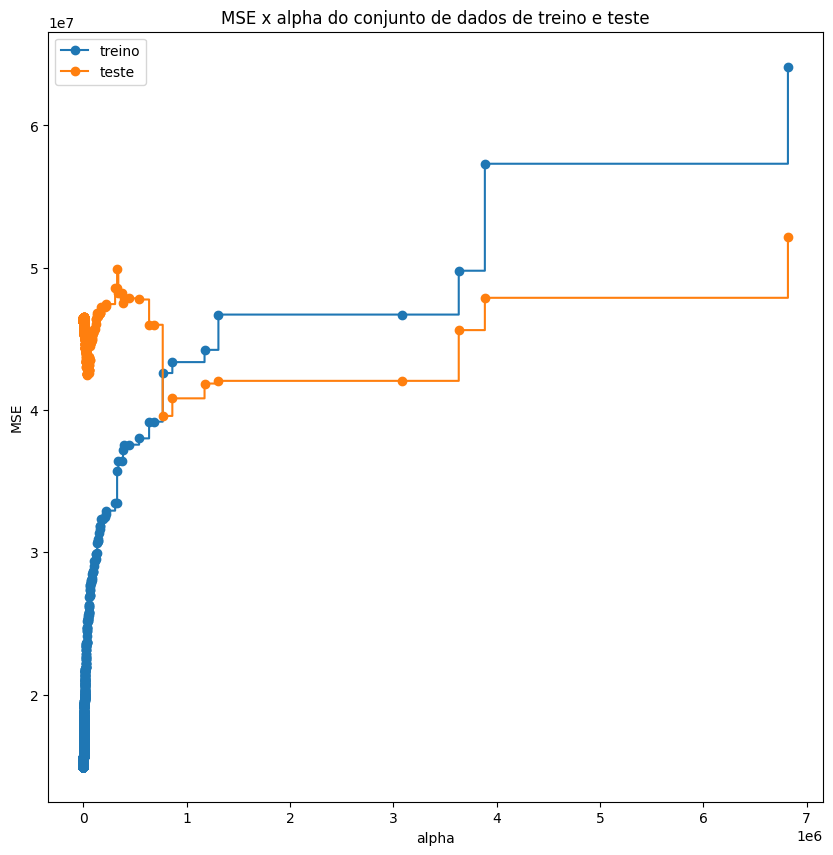

In [336]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [354]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=700000)
arvore_final.fit(X_train_1, y_train)

print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'R-quadrado na base de testes: {arvore_final.score(X_test_1, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test_1)):.2f}')

Profundidade: 5
R-quadrado na base de testes: 0.37
MSE na base de testes: 39584101.65


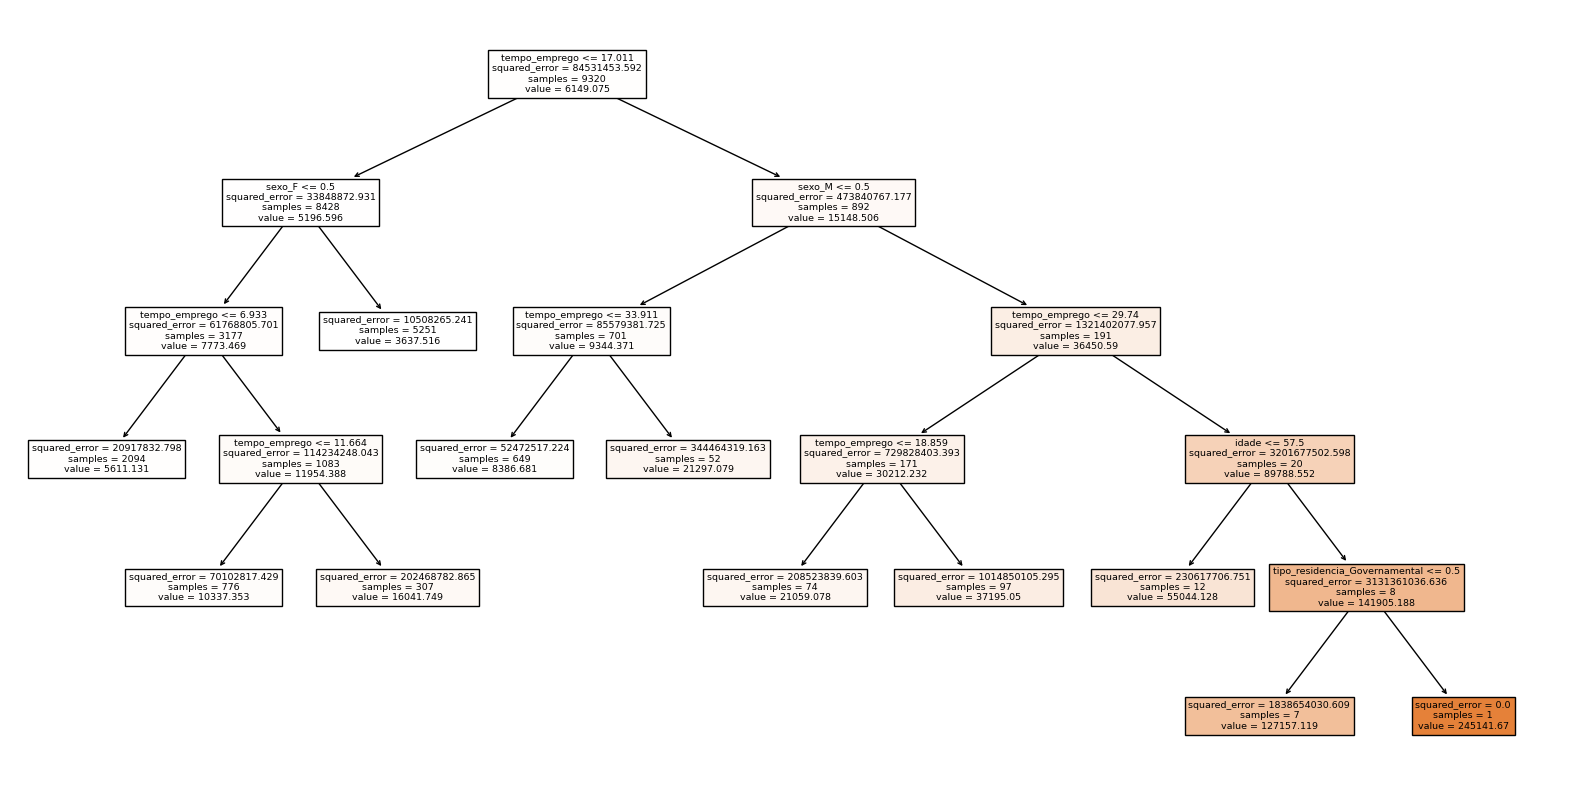

In [346]:
plt.rc('figure', figsize=(20, 10))
tp = tree.plot_tree(arvore_final,
                    feature_names=X_train_1.columns,
                    filled=True)

Realizando um modelo de árvore de regressão o valor de R² obtido foi de 0.37, este valor é maior que os valores obtidos nos modelos de regressão acima.